In [3]:
%pylab inline
import fairtest.bugreport.trees.tree_builder as tree_builder
import fairtest.bugreport.trees.categorical_tree as cat_tree
import fairtest.bugreport.clustering.tree_clustering as tree_clustering
import fairtest.bugreport.trees.tree_builder as builder
import fairtest.bugreport.clustering.display_clusters as displ_clust
import fairtest.bugreport.statistics.fairness_measures as fm
import fairtest.bugreport.statistics.multiple_testing as multitest
import fairtest.bugreport.api as api
import pandas as pd
import ast
import sklearn.cross_validation as cross_validation
import sklearn.preprocessing as preprocessing
import imp
import rpy2.robjects as ro
from rpy2.robjects import numpy2ri

RANDOM_SEED = 0
numpy2ri.activate()
ro.r('set.seed({})'.format(RANDOM_SEED))

Populating the interactive namespace from numpy and matplotlib


rpy2.rinterface.NULL

In [4]:
import fairtest.bugreport.api2 as api2
imp.reload(api2)

'''
dataname = 'adult.csv'
data = pd.read_csv(
            '../data/adult/adult.csv',
            header=0,
            sep=r'\s*,\s*',
            engine='python',
            na_values="?")
data = data.drop('fnlwgt', axis=1)
#data['race'] = map(lambda x: 'Asian' if 'Asian' in x else 'Indian' if 'Indian' in x else x, data['race'])
#data['race'] = map(lambda x: 'Asian' if 'Asian' in x else 'Black & Other' if ('Indian' in x or 'Other' in x or 'Black' in x) else x, data['race'])
#data['hours-per-week'] = map(lambda x: '≥40' if x>=40 else '<40', data['hours-per-week'])
TARGET = 'income'
SENS = ['sex', 'race']
#SENS = ['sex']
EXPL = []
'''

'''
dataname = 'medical.csv'
data = pd.read_csv(
            '../data/medical/predictions_bin_4_25.csv',
            header=0,
            sep=r'\s*,\s*',
            engine='python',
            na_values="?")
outputs = ['Correct', 'FP', 'FN']
data['Prediction'] = map(lambda l: outputs[l.index(1)], zip(data['Pred_Correct'], data['Pred_FP'], data['Pred_FN']))
data = data.drop('Pred_Correct', axis=1)
data = data.drop('Pred_FP', axis=1)
data = data.drop('Pred_FN', axis=1)
data = data.drop('Pred_TP', axis=1)
data = data.drop('Pred_TN', axis=1)
TARGET = 'Prediction'
SENS = ['Age']
EXPL = []
'''

dataname = 'medical'
data = pd.read_csv(
            '../data/medical/predictions_reg_25.csv',
            header=0,
            sep=r'\s*,\s*',
            engine='python',
            na_values="?")
data['Error'] = abs(data['Error'])
TARGET = 'Error'
SENS = ['Age']
EXPL = []

'''
dataname = 'berkeley.csv'
data = pd.read_csv(
            '../data/berkeley/berkeley.csv',
            header=0,
            sep=r'\s*,\s*',
            engine='python',
            na_values="?")
TARGET = 'accepted'
SENS = ['gender']
EXPL = ['department']
#EXPL = []
'''
'''
dataname = 'staples.csv'
data = pd.read_csv(
            '../data/staples/staples.csv',
            header=0,
            sep=r'\s*,\s*',
            engine='python',
            na_values="?")
data = data.drop('zipcode', axis=1)
data = data.drop('distance', axis=1)
data = data.drop('city', axis=1)
TARGET = 'price'
SENS = ['income', 'race']
EXPL = []
data['race'] = map(lambda x: 'Asian' if 'Asian' in x else 
                   'Indian & Alaska Native' if 'Indian' in x  else
                   'Black' if 'Black' in x  else
                   'Hispanic' if 'Latino' in x else
                   'Pacific Islander' if 'Pacific' in x else
                   'White' if 'White' in x else
                   '2+ Races' if 'Two' in x else
                   'Other' if 'Other' in x else
                    x, data['race'])
'''
'''
dataname = 'overfeat.txt'
data = pd.read_csv(
            #'../data/images/lfw_black-white.txt',
            '../data/images/overfeat_raw.txt',
            header=0,
            sep=r'\s*\t\s*',
            engine='python',
            na_values="?")
TARGET = 'Labels'
SENS = ['Race']
EXPL = []
labeled_data = map(lambda s: ast.literal_eval(s), data[TARGET])
for l in labeled_data:
    assert len(l) == 5
label_encoder = preprocessing.MultiLabelBinarizer()
labeled_data = label_encoder.fit_transform(labeled_data)
labels = label_encoder.classes_
df_labels = pd.DataFrame(labeled_data, columns=labels)
data = pd.concat([data.drop(TARGET, axis=1), df_labels], axis=1)
TARGET = labels.tolist()
'''
'''
dataname = 'overfeat.txt'
data = pd.read_csv(
            '../data/images/overfeat_raw.txt',
            header=0,
            sep=r'\s*\t\s*',
            engine='python',
            na_values="?")
TARGET = 'Labels'
SENS = ['Race']
EXPL = []
labeled_data = map(lambda s: ast.literal_eval(s), data[TARGET])
for l in labeled_data:
    assert len(l) == 5
data['Gorilla'] = map(lambda l: 'Yes' if 'chimpanzee' in l else 'No', labeled_data)    
data = data.drop(TARGET, axis=1)
TARGET = 'Gorilla'
'''
'''
dataname = 'movies.txt'
data = pd.read_csv(
            '../data/recommender/recommendations_labels.txt',
            header=0,
            sep=r'\s*\t\s*',
            engine='python',
            na_values="?")
data=data.rename(columns = {'avgScore':'Avg Movie Rating', 'age': 'Age', 'gender': 'Gender'})
SENS = ['Gender', 'Age']
TARGET = 'Avg Movie Rating'
EXPL = []

data = data.drop(set(['userID', 'occupation', 'Avg Movie Rating', 'RMSE', 'Labels'])-set([TARGET]), axis=1)
if 'Age' in SENS and TARGET == 'Labels':
    data['Age'] = map(lambda a: '<35' if a <35 else '>35', data['Age'])
else:
    data['Age'] = map(lambda a: 10 if a ==1 
                      else 20 if a == 18 
                      else 30 if a == 25 
                      else 40 if a == 35 
                      else 50 if a == 45 or a == 50
                      else 60 if a == 56 else None, data['Age'])

if TARGET == 'Labels':
    labeled_data = map(lambda s: ast.literal_eval(s), data[TARGET])
    for labels in labeled_data:
        assert(len(labels) == 50)
    label_encoder = preprocessing.MultiLabelBinarizer()
    labeled_data = label_encoder.fit_transform(labeled_data)
    labels = label_encoder.classes_
    df_labels = pd.DataFrame(labeled_data, columns=labels)
    data = pd.concat([data.drop(TARGET, axis=1), df_labels], axis=1)
    TARGET = labels.tolist()
'''
'''
dataname = 'movies.txt'
data = pd.read_csv(
            '../data/recommender/recommendations_types.txt',
            header=0,
            sep=r'\s*\t\s*',
            engine='python',
            na_values="?")
data=data.rename(columns = {'Average_age':'Avg Movie Age', 'age': 'Age', 'gender': 'Gender'})
TARGET = 'Avg Movie Age'
SENS = ['Gender', 'Age']
if 'Age' in SENS and TARGET == 'Types':
    data['Age'] = map(lambda a: '<35' if a <35 else '>=35', data['Age'])

EXPL = []
if TARGET == 'Avg Movie Age':
    data = data.drop('Types', axis=1)
    data['Age'] = map(lambda a: 10 if a ==1 
                      else 20 if a == 18 
                      else 30 if a == 25 
                      else 40 if a == 35 
                      else 50 if a == 45 or a == 50
                      else 60 if a == 56 else None, data['Age'])
else:
    labeled_data = map(lambda s: ast.literal_eval(s), data[TARGET])
    for labels in labeled_data:
        assert(len(labels) == 5)
    label_encoder = preprocessing.MultiLabelBinarizer()
    labeled_data = label_encoder.fit_transform(labeled_data)
    labels = label_encoder.classes_
    df_labels = pd.DataFrame(labeled_data, columns=labels)
    data = pd.concat([data.drop(TARGET, axis=1), df_labels], axis=1)
    TARGET = labels.tolist()
'''
'''
dataname = 'benchmark.csv'
data = pd.read_csv(
            '../data/benchmark/benchmark.csv',
            header=0,
            sep=r'\s*,\s*',
            engine='python',
            na_values="?")
TARGET = 'price'
SENS = ['race', 'income']
EXPL = []
'''
#measures={'gender': fm.COND_DIFF(ci_level=0.95)}
measures = {}
experiment = api2.Experiment(data, SENS, TARGET, EXPL, train_size=0.5, measures=measures, topk=35, random_state=RANDOM_SEED)
print len(experiment.train_set), len(experiment.test_set)
experiment.train_set.tail()

43179 43179


,Age,Average Charlson Index,Average Days Since First Service,Average Drug Count,Average Lab Count,Average Length Of Stay,Average Payment Delay,Condition AMI,Condition APPCHOL,Condition ARTHSPIN,...,Treatment Code SIS,Treatment Code SMCD,Treatment Code SMS,Treatment Code SNS,Treatment Code SO,Treatment Code SRS,Treatment Code SUS,Unknown Length Of Stay,Gender,Error
21243,55,0,1,2.000000,0,0,54,0,0,0,...,0,0,0,0,0,0,0,2,1,0.137452
45891,75,1,4,1.714285,9,0,62,2,0,6,...,0,0,1,0,0,0,0,27,1,0.371211
42613,5,0,1,0.000000,0,0,21,0,0,0,...,0,0,0,0,0,0,0,1,1,0.891361
43567,45,0,1,1.000000,3,0,42,0,0,0,...,0,0,0,0,0,0,0,3,1,0.098608
68268,55,0,2,1.166666,4,0,92,0,0,0,...,0,0,0,0,0,0,0,5,0,0.119511


In [5]:
imp.reload(fm)
imp.reload(cat_tree)
imp.reload(builder)
import cProfile
experiment.train(score_aggregation='avg', min_leaf_size=100, max_depth=5)

In [6]:
print experiment.trained_trees['Age']


               /-Condition MISCL1 <= 0.5
            /-|
           |   \-Condition MISCL1 > 0.5
         /-|
        |  |   /-Condition COPD <= 1.5
        |   \-|
        |      \-Condition COPD > 1.5
      /-|
     |  |      /-Average Payment Delay <= 80.5
     |  |   /-|
     |  |  |   \-Average Payment Delay > 80.5
     |   \-|
     |     |   /-Stdev Days Since First Service <= 3.09845045997
     |      \-|
   /-|         \-Stdev Days Since First Service > 3.09845045997
  |  |
  |  |         /-Speciality Obstetrics and Gynecology <= 0.5
  |  |      /-|
  |  |     |   \-Speciality Obstetrics and Gynecology > 0.5
  |  |   /-|
  |  |  |  |   /-Condition RESPR4 <= 3.5
  |  |  |   \-|
  |   \-|      \-Condition RESPR4 > 3.5
  |     |
--|     |   /-Condition FXDISLC <= 1.5
  |      \-|
  |        |   /-Average Payment Delay <= 51.5
  |         \-|
  |            \-Average Payment Delay > 51.5
  |
  |         /-Average Days Since First Service <= 3.5
  |      /-|
  |   /-|   \-Average D

In [7]:
imp.reload(multitest)
imp.reload(fm)
imp.reload(tree_clustering)

experiment.test(approx_stats=False, prune_insignificant=True)

Commit Hash: 	06a56774982efbb58bc65a8a17b119cfe37325b7

Dataset: medical
Train Size: 43179
Test Size: 43179
S: ['Age']
X: ['Stdev Length Of Stay', 'Treated at Home', 'Supressed
	Length Of Stay', 'Condition RENAL1', 'No Lab Count',
	'Condition RENAL3', 'Condition RENAL2', 'Speciality
	Diagnostic Imaging', 'Lab Months', 'Number Of Claims', 'No
	Drug Count', 'Range Charlson IndexI_range', 'Number of
	Vendors', 'Number Of Specialties', 'Treated at Outpatient
	Hospital', 'Treatment Code RAD', 'Number of Procedure
	Groups', 'Condition INFEC4', 'Max Lab Count', 'Average Lab
	Count', 'Treated at Office', 'Condition PERVALV', 'Number of
	Places Where Treated', 'Condition FXDISLC', 'Condition
	SEIZURE', 'Treatment Code SMCD', 'Treatment Code EM',
	'Average Drug Count', 'Condition HEMTOL', 'Speciality NULL',
	'Condition FLaELEC', 'Treatment Code SNS', 'Treatment Code
	SUS', 'Number of Primary Physicians', 'Condition NEUMENT',
	'Speciality Laboratory', 'Speciality Other', 'Average
	Payment Delay',

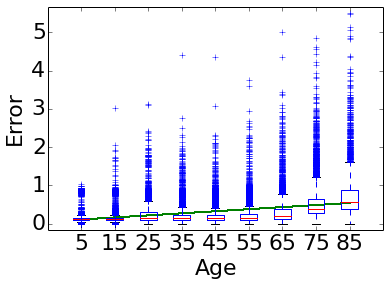

p-value = 3.90e-179 ; CORR = [0.3219, 0.3494]

Sub-Population of size 180
Context = {'Condition RESPR4': (-inf, 1.5], 'Condition INFEC4': (1.5, inf), 'Average Payment Delay': (80.5, inf), 'Speciality Emergency': (-inf, 0.5]}



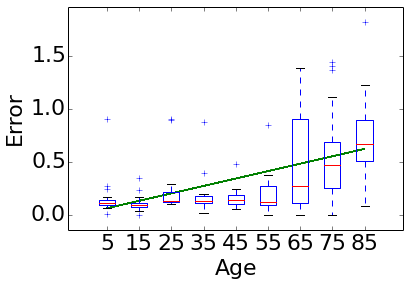

p-value = 2.20e-03 ; CORR = [0.4422, 0.7160]
--------------------------------------------------------------------------------

Sub-Population of size 123
Context = {'Speciality Emergency': (0.5, 4.5], 'Condition FXDISLC': (0.5, 1.5]}



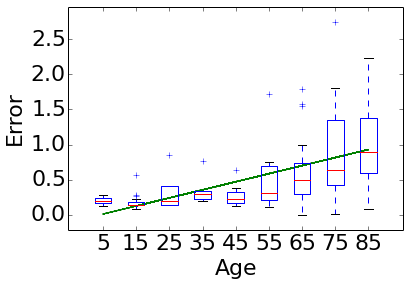

p-value = 2.20e-03 ; CORR = [0.4126, 0.7009]
--------------------------------------------------------------------------------

Sub-Population of size 5303
Context = {'Speciality Obstetrics and Gynecology': (-inf, 0.5], 'Condition INFEC4': (-inf, 0.5], 'Speciality Emergency': (0.5, 4.5], 'Condition FXDISLC': (-inf, 0.5]}



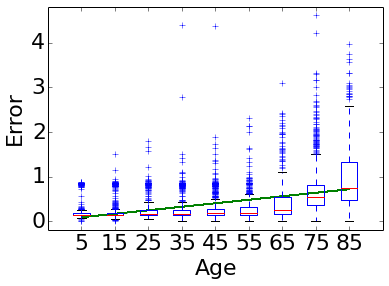

p-value = 3.90e-179 ; CORR = [0.3839, 0.4567]
--------------------------------------------------------------------------------

Sub-Population of size 539
Context = {'Speciality Emergency': (0.5, 4.5], 'Condition FXDISLC': (0.5, inf)}



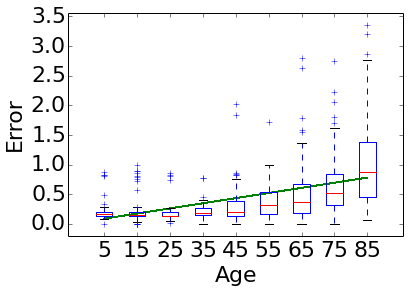

p-value = 2.20e-03 ; CORR = [0.3794, 0.5388]
--------------------------------------------------------------------------------

Sub-Population of size 8177
Context = {'Speciality Emergency': (0.5, 4.5]}



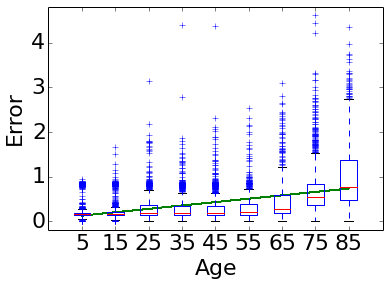

p-value = 3.90e-179 ; CORR = [0.3792, 0.4385]
--------------------------------------------------------------------------------

Sub-Population of size 558
Context = {'Speciality Emergency': (4.5, inf)}



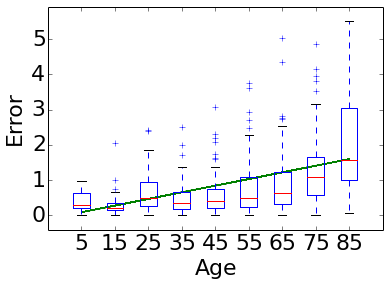

p-value = 2.20e-03 ; CORR = [0.3778, 0.5316]
--------------------------------------------------------------------------------

Sub-Population of size 2617
Context = {'Condition COPD': (-inf, 1.5], 'Condition INFEC4': (-inf, 1.5], 'Speciality Emergency': (-inf, 0.5], 'Treated at Urgent Care': (0.5, inf)}



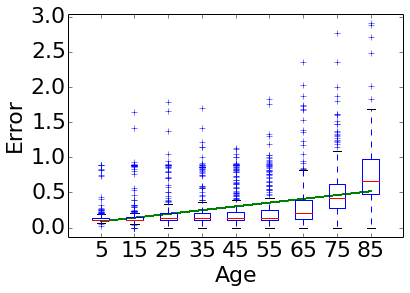

p-value = 5.24e-100 ; CORR = [0.3410, 0.4472]
--------------------------------------------------------------------------------

Sub-Population of size 2010
Context = {'Condition INFEC4': (1.5, inf), 'Speciality Emergency': (-inf, 0.5]}



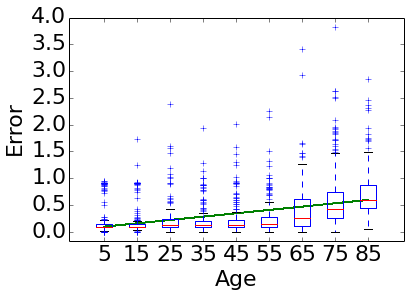

p-value = 1.50e-79 ; CORR = [0.3394, 0.4599]
--------------------------------------------------------------------------------

Sub-Population of size 2761
Context = {'Condition INFEC4': (-inf, 1.5], 'Speciality Emergency': (-inf, 0.5], 'Treated at Urgent Care': (0.5, inf)}



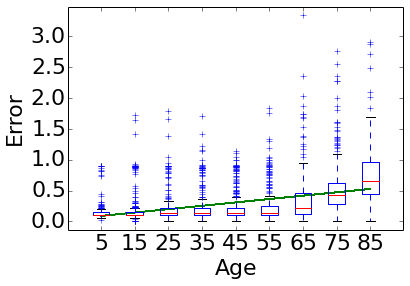

p-value = 3.81e-103 ; CORR = [0.3384, 0.4422]
--------------------------------------------------------------------------------

Sub-Population of size 42621
Context = {'Speciality Emergency': (-inf, 4.5]}



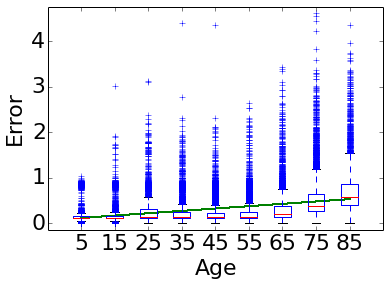

p-value = 3.90e-179 ; CORR = [0.3261, 0.3537]
--------------------------------------------------------------------------------

Hierarchical printing of subpopulations (summary)


 Context = {} ; CI = [0.3219, 0.3494] ; Size = 43179
   Context = {'Speciality Emergency': (-inf, 4.5]} ; CI = [0.3261, 0.3537] ; Size = 42621
     Context = {'Condition INFEC4': (-inf, 1.5], 'Speciality Emergency': (-inf, 0.5], 'Treated at Urgent Care': (0.5, inf)} ; CI = [0.3384, 0.4422] ; Size = 2761
       Context = {'Condition COPD': (-inf, 1.5], 'Condition INFEC4': (-inf, 1.5], 'Speciality Emergency': (-inf, 0.5], 'Treated at Urgent Care': (0.5, inf)} ; CI = [0.3410, 0.4472] ; Size = 2617
     Context = {'Condition INFEC4': (1.5, inf), 'Speciality Emergency': (-inf, 0.5]} ; CI = [0.3394, 0.4599] ; Size = 2010
       Context = {'Condition RESPR4': (-inf, 1.5], 'Condition INFEC4': (1.5, inf), 'Average Payment Delay': (80.5, inf), 'Speciality Emergency': (-inf, 0.5]} ; CI = [0.4422, 0.7160] ; Size = 180
  

[{},
 {'Speciality Emergency': (-inf, 4.5]},
 {'Condition INFEC4': (-inf, 1.5],
  'Speciality Emergency': (-inf, 0.5],
  'Treated at Urgent Care': (0.5, inf)},
 {'Condition COPD': (-inf, 1.5],
  'Condition INFEC4': (-inf, 1.5],
  'Speciality Emergency': (-inf, 0.5],
  'Treated at Urgent Care': (0.5, inf)},
 {'Condition INFEC4': (1.5, inf), 'Speciality Emergency': (-inf, 0.5]},
 {'Average Payment Delay': (80.5, inf),
  'Condition INFEC4': (1.5, inf),
  'Condition RESPR4': (-inf, 1.5],
  'Speciality Emergency': (-inf, 0.5]},
 {'Speciality Emergency': (0.5, 4.5]},
 {'Condition FXDISLC': (-inf, 0.5],
  'Condition INFEC4': (-inf, 0.5],
  'Speciality Emergency': (0.5, 4.5],
  'Speciality Obstetrics and Gynecology': (-inf, 0.5]},
 {'Condition FXDISLC': (0.5, inf), 'Speciality Emergency': (0.5, 4.5]},
 {'Condition FXDISLC': (0.5, 1.5], 'Speciality Emergency': (0.5, 4.5]},
 {'Speciality Emergency': (4.5, inf)}]

In [8]:
imp.reload(displ_clust)
experiment.report(dataname, None, filter_by='better_than_ancestors', sort_by='effect')

In [171]:
imp.reload(api2)

#
# X = [ 'race', 'city', 'state']
# 'race' in [0, 1, 2]
# 'city' in [0, 1, 2, 3, 4]
# 'state' in [0, 1, 2, 3, 4]
#
X = np.array([[1, 2, 2], [0, 0, 2], [0, 0, 1], [0, 0, 3], [2, 4, 3], [0, 0, 3],\
        [1, 4, 3], [2, 2, 2], [0, 0, 0], [0, 0, 3], [1, 2, 0], [0, 1, 1],\
        [2, 4, 4], [2, 4, 2], [2, 1, 3], [1, 4, 3], [1, 4, 3], [0, 3, 4],\
        [2, 2, 4], [2, 4, 2], [0, 0, 3], [2, 3, 3], [0, 0, 2], [0, 0, 2],\
        [0, 2, 2], [1, 3, 4], [0, 3, 4], [2, 1, 1], [2, 4, 4], [2, 1, 4],\
        [0, 4, 4], [0, 4, 4], [1, 2, 2], [1, 2, 2], [0, 0, 1], [1, 2, 1],\
        [0, 0, 1], [1, 1, 1], [0, 2, 2], [1, 2, 4], [1, 2, 0], [0, 0, 1],\
        [2, 3, 2], [0, 0, 3], [2, 3, 1], [2, 1, 0], [1, 2, 0], [0, 4, 2],\
        [2, 3, 3], [0, 4, 1]]*1000).astype(str)

#
# y = [ 'price']
# 'price' in [0, 1]
#
# 'city' == 0 will always get 'price' == 1 and  have people with 'race' == 0
#
y = np.array([0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,\
        1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,\
        0, 1, 1, 1, 0]*1000).astype(str)

data = np.concatenate((X, np.array([y]).T), axis=1)

SENS = [0]
EXPL = []
TARGET = 3

FT2 = api2.Fairtest(data, SENS, TARGET, EXPL)

In [172]:
FT2.train()

TRAINING WITH SENSITIVE FEATURE 0
targets = [3]
contextual features = set([1, 2])
dim = (2, 3)
thresholds = {}
splitting on 2 (score=0.429177121282) with threshold None at pred []
splitting on 1 (score=0.534268097539) with threshold None at pred ['2 = 4']
splitting on 1 (score=0.181704093727) with threshold None at pred ['2 = 1']
splitting on 1 (score=0.229032453336) with threshold None at pred ['2 = 3']
splitting on 1 (score=0.173369659845) with threshold None at pred ['2 = 2']


In [173]:
imp.reload(tree_clustering)
FT2.test()

In [174]:
imp.reload(display)
FT2.report(None)

Global Population of size 25000

+-------+---------------+--------------+--------------+----------------+
|   3   |       0       |      1       |      2       |     Total      |
+-------+---------------+--------------+--------------+----------------+
|   0   |   488 (4.4%)  | 4465 (68.8%) | 2992 (40.0%) |  7945 (31.8%)  |
|   1   | 10549 (95.6%) | 2022 (31.2%) | 4484 (60.0%) | 17055 (68.2%)  |
| Total | 11037 (44.1%) | 6487 (25.9%) | 7476 (29.9%) | 25000 (100.0%) |
+-------+---------------+--------------+--------------+----------------+

p-value = 2.30e-179 ; NMI = [0.2737, 0.3116]

Sub-Population of size 1972
Context = {1: '4', 2: '3'}

+-------+------------+-----------------+----------------+-----------------+
|   3   |     0      |        1        |       2        |      Total      |
+-------+------------+-----------------+----------------+-----------------+
|   0   | 0.0 (nan%) | 1483.0 (100.0%) |   0.0 (0.0%)   |  1483.0 (75.2%) |
|   1   | 0.0 (nan%) |    0.0 (0.0%)   | 489.0 (1